In [ ]:
import requests
import time
from datetime import datetime
from sqlalchemy import create_engine, Column, String, Float, Integer, Date, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker


API_KEY = '018eb0494ee0b6064af8f8be9944784a'
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'
CITIES = ['Delhi', 'Mumbai', 'Chennai', 'Bangalore', 'Kolkata', 'Hyderabad']

DATABASE_URL = 'sqlite:///weather_data.db'
Base = declarative_base()
engine = create_engine(DATABASE_URL)
Session = sessionmaker(bind=engine)

class WeatherSummary(Base):
    __tablename__ = 'weather_summaries'

    id = Column(Integer, primary_key=True)
    city = Column(String)
    average_temp = Column(Float)
    max_temp = Column(Float)
    min_temp = Column(Float)
    dominant_weather = Column(String)
    date = Column(Date, default=datetime.utcnow)
Base.metadata.create_all(engine)
def fetch_weather(city):
    params = {
        'q': city,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    print(f"Response for {city}: {data}")
    if 'main' in data:
        return {
            'city': city,
            'temperature': data['main']['temp'],
            'feels_like': data['main']['feels_like'],
            'weather': data['weather'][0]['main'],
            'timestamp': data['dt']
        }
    else:
        print(f"Error fetching weather data for {city}: {data.get('message', 'Unknown error')}")
        return None
def calculate_daily_summary(city, daily_data):
    temperatures = [data['temperature'] for data in daily_data]
    weather_conditions = [data['weather'] for data in daily_data]

    avg_temp = sum(temperatures) / len(temperatures) if temperatures else 0
    max_temp = max(temperatures) if temperatures else 0
    min_temp = min(temperatures) if temperatures else 0
    dominant_weather = max(set(weather_conditions), key=weather_conditions.count) if weather_conditions else None

    return {
        'city': city,
        'average_temp': avg_temp,
        'max_temp': max_temp,
        'min_temp': min_temp,
        'dominant_weather': dominant_weather
    }
def store_weather_summary(summary):
    session = Session()
    weather_summary = WeatherSummary(
        city=summary['city'],
        average_temp=summary['average_temp'],
        max_temp=summary['max_temp'],
        min_temp=summary['min_temp'],
        dominant_weather=summary['dominant_weather'],
        date=datetime.utcnow().date()
    )
    session.add(weather_summary)
    session.commit()
    session.close()
def check_alerts(weather_data, threshold):
    for city, updates in weather_data.items():
        if updates:
            latest_temp = updates[-1]['temperature']
            if latest_temp > threshold:
                print(f"Alert: {city} temperature exceeded {threshold}°C. Current: {latest_temp}°C.")
def run_weather_monitoring(interval=300, temp_threshold=35):
    weather_data = {city: [] for city in CITIES}

    while True:
        print("Fetching weather data...")
        for city in CITIES:
            data = fetch_weather(city)
            if data:
                weather_data[city].append(data)
                print(f"{city}: {data['temperature']}°C, {data['weather']}")
        check_alerts(weather_data, temp_threshold)
        current_time = datetime.now()
        if current_time.hour == 23 and current_time.minute == 59:
            for city in CITIES:
                if weather_data[city]:
                    summary = calculate_daily_summary(city, weather_data[city])
                    store_weather_summary(summary)
                    print(f"Daily summary for {city}: {summary}")
                    weather_data[city] = []
        time.sleep(interval)
run_weather_monitoring()

<ipython-input-1-fa51183b56bf>:15: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


Fetching weather data...
Response for Delhi: {'coord': {'lon': 77.2167, 'lat': 28.6667}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 34.05, 'feels_like': 32.45, 'temp_min': 34.05, 'temp_max': 34.05, 'pressure': 1008, 'humidity': 24, 'sea_level': 1008, 'grnd_level': 983}, 'visibility': 4000, 'wind': {'speed': 1.03, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1729158347, 'sys': {'type': 1, 'id': 9165, 'country': 'IN', 'sunrise': 1729126383, 'sunset': 1729167572}, 'timezone': 19800, 'id': 1273294, 'name': 'Delhi', 'cod': 200}
Delhi: 34.05°C, Haze
Response for Mumbai: {'coord': {'lon': 72.8479, 'lat': 19.0144}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 30.99, 'feels_like': 37.99, 'temp_min': 30.94, 'temp_max': 30.99, 'pressure': 1005, 'humidity': 74, 'sea_level': 1005, 'grnd_level': 1005}, 'visibility': 3000, 'wind': {'speed': 3.6, 'deg': 300}, '

KeyboardInterrupt: 

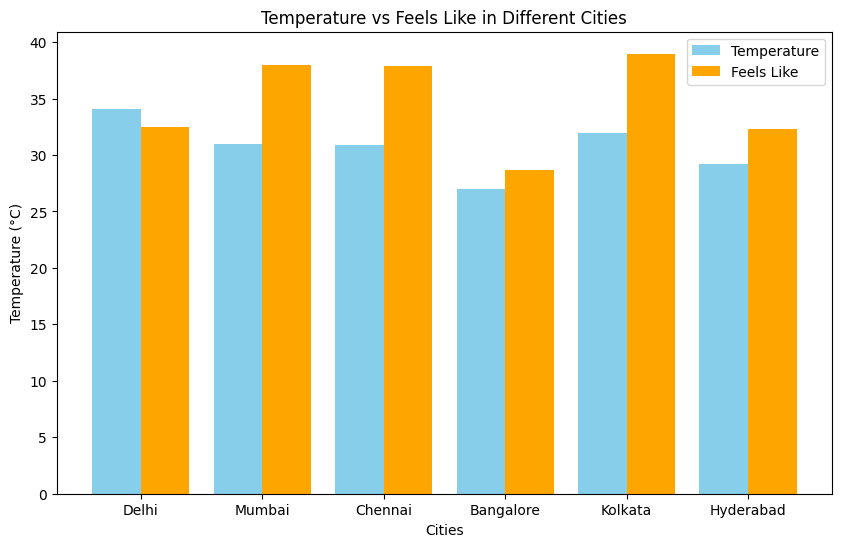

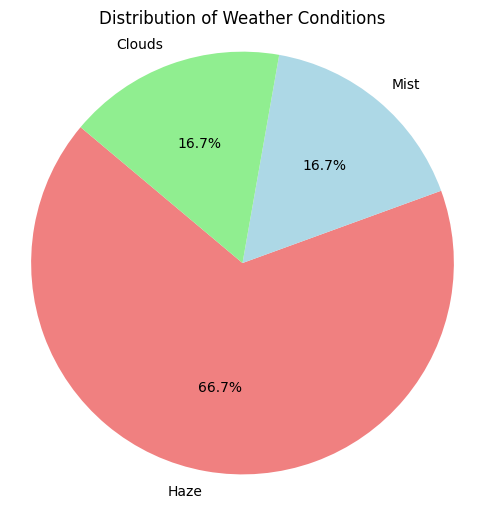

In [4]:
import matplotlib.pyplot as plt

# City weather data
weather_data = {
    "Delhi": {"temp": 34.05, "feels_like": 32.45, "condition": "Haze"},
    "Mumbai": {"temp": 30.99, "feels_like": 37.99, "condition": "Haze"},
    "Chennai": {"temp": 30.88, "feels_like": 37.88, "condition": "Mist"},
    "Bangalore": {"temp": 26.96, "feels_like": 28.71, "condition": "Clouds"},
    "Kolkata": {"temp": 31.97, "feels_like": 38.97, "condition": "Haze"},
    "Hyderabad": {"temp": 29.23, "feels_like": 32.29, "condition": "Haze"},
}

# Extract city names, temperatures, and weather conditions
cities = list(weather_data.keys())
temperatures = [data['temp'] for data in weather_data.values()]
feels_like_temps = [data['feels_like'] for data in weather_data.values()]
conditions = [data['condition'] for data in weather_data.values()]

# Plot temperature comparison (Temperature vs Feels Like)
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(cities))

# Bar chart for actual temperature
plt.bar(index, temperatures, bar_width, label='Temperature', color='skyblue')

# Bar chart for 'Feels Like' temperature
plt.bar([i + bar_width for i in index], feels_like_temps, bar_width, label='Feels Like', color='orange')

plt.xlabel('Cities')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Feels Like in Different Cities')
plt.xticks([i + bar_width / 2 for i in index], cities)
plt.legend()
plt.show()

# Plot pie chart for weather conditions
condition_counts = {condition: conditions.count(condition) for condition in set(conditions)}

# Labels and sizes for the pie chart
labels = condition_counts.keys()
sizes = condition_counts.values()
colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold']

# Pie chart for weather conditions
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Weather Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


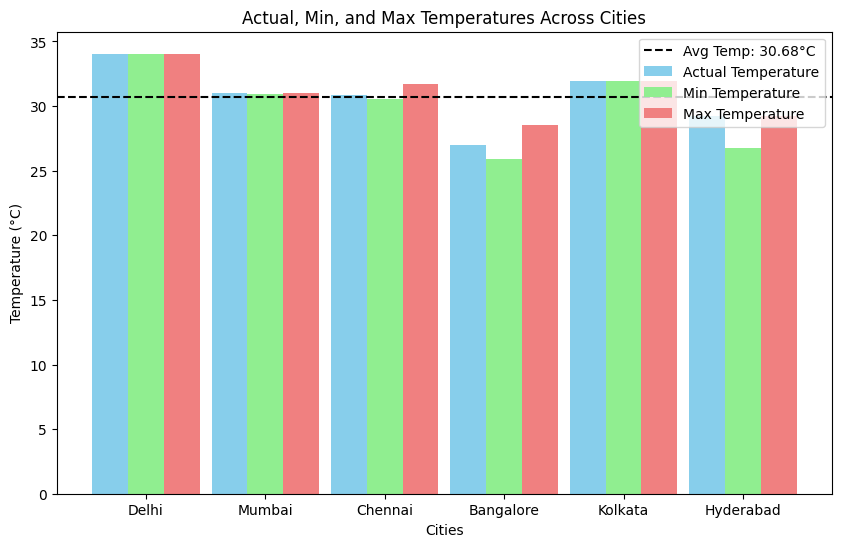

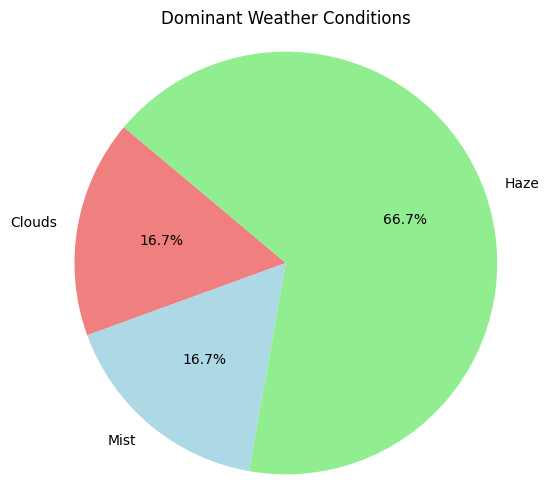

In [ ]:
import matplotlib.pyplot as plt

# City weather data with additional parameters
weather_data = {
    "Delhi": {"temp": 34.05, "feels_like": 32.45, "temp_min": 34.05, "temp_max": 34.05, "pressure": 1008, "humidity": 24, "condition": "Haze"},
    "Mumbai": {"temp": 30.99, "feels_like": 37.99, "temp_min": 30.94, "temp_max": 30.99, "pressure": 1005, "humidity": 74, "condition": "Haze"},
    "Chennai": {"temp": 30.88, "feels_like": 37.88, "temp_min": 30.56, "temp_max": 31.7, "pressure": 1005, "humidity": 79, "condition": "Mist"},
    "Bangalore": {"temp": 26.96, "feels_like": 28.71, "temp_min": 25.9, "temp_max": 28.51, "pressure": 1006, "humidity": 69, "condition": "Clouds"},
    "Kolkata": {"temp": 31.97, "feels_like": 38.97, "temp_min": 31.97, "temp_max": 31.97, "pressure": 1008, "humidity": 70, "condition": "Haze"},
    "Hyderabad": {"temp": 29.23, "feels_like": 32.29, "temp_min": 26.73, "temp_max": 29.23, "pressure": 1006, "humidity": 65, "condition": "Haze"},
}

# Extract city names, temperatures, and weather conditions
cities = list(weather_data.keys())
temperatures = [data['temp'] for data in weather_data.values()]
min_temperatures = [data['temp_min'] for data in weather_data.values()]
max_temperatures = [data['temp_max'] for data in weather_data.values()]
conditions = [data['condition'] for data in weather_data.values()]

# Step 3: Calculate average temperature
avg_temperature = sum(temperatures) / len(temperatures)

# Plot temperature comparison (Actual, Min, and Max Temperature)
plt.figure(figsize=(10, 6))
bar_width = 0.3
index = range(len(cities))

# Bar chart for actual temperature
plt.bar(index, temperatures, bar_width, label='Actual Temperature', color='skyblue')

# Bar chart for minimum temperature
plt.bar([i + bar_width for i in index], min_temperatures, bar_width, label='Min Temperature', color='lightgreen')

# Bar chart for maximum temperature
plt.bar([i + 2 * bar_width for i in index], max_temperatures, bar_width, label='Max Temperature', color='lightcoral')

plt.axhline(avg_temperature, color='black', linestyle='--', label=f'Avg Temp: {avg_temperature:.2f}°C')

plt.xlabel('Cities')
plt.ylabel('Temperature (°C)')
plt.title('Actual, Min, and Max Temperatures Across Cities')
plt.xticks([i + bar_width for i in index], cities)
plt.legend()
plt.show()

# Plot pie chart for dominant weather conditions
condition_counts = {condition: conditions.count(condition) for condition in set(conditions)}

# Labels and sizes for the pie chart
labels = condition_counts.keys()
sizes = condition_counts.values()
colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold']

# Pie chart for weather conditions
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Dominant Weather Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


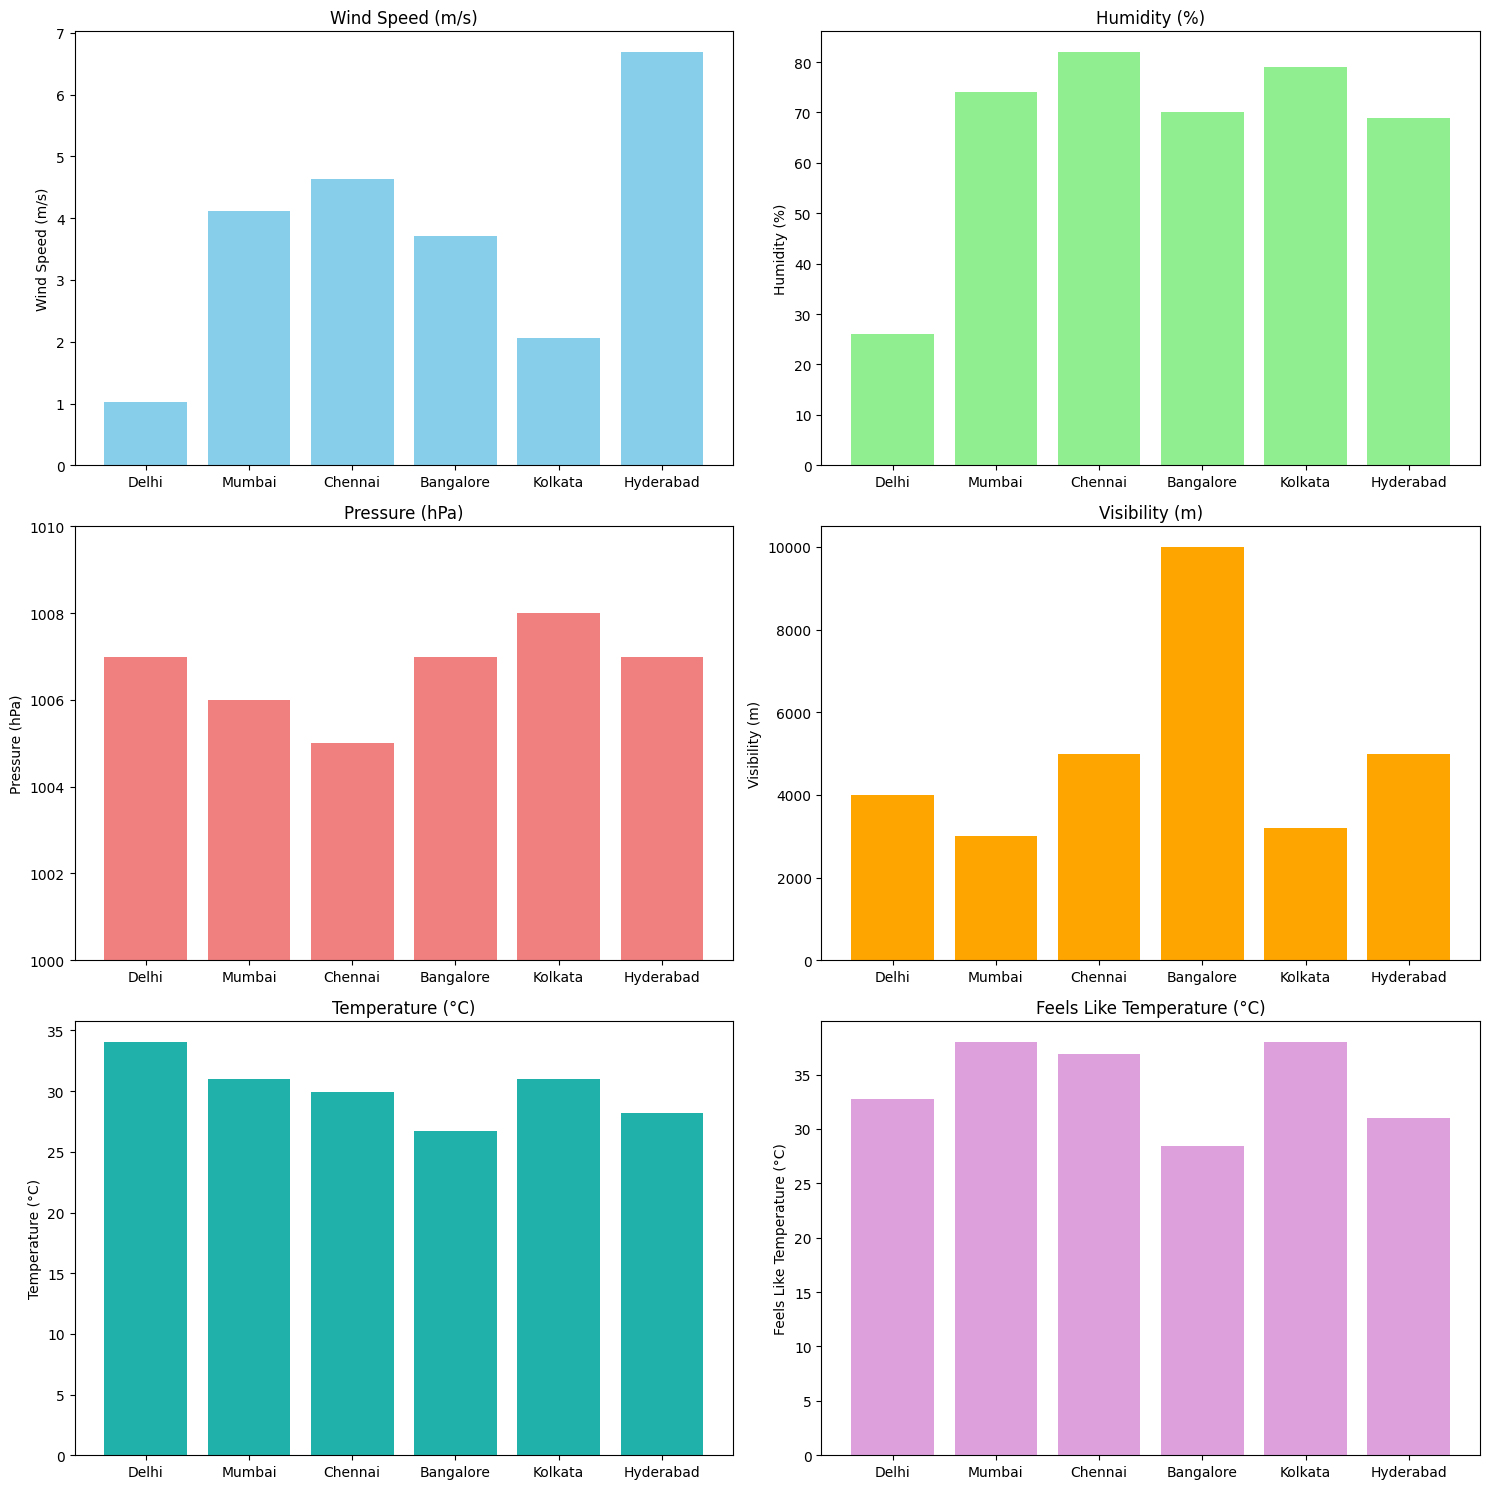

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each city
cities = ['Delhi', 'Mumbai', 'Chennai', 'Bangalore', 'Kolkata', 'Hyderabad']
wind_speed = [1.03, 4.12, 4.63, 3.71, 2.06, 6.69]  # in m/s
humidity = [26, 74, 82, 70, 79, 69]  # in %
pressure = [1007, 1006, 1005, 1007, 1008, 1007]  # in hPa
visibility = [4000, 3000, 5000, 10000, 3200, 5000]  # in meters
temperature = [34.05, 30.99, 29.92, 26.75, 30.97, 28.23]  # in °C
feels_like = [32.72, 37.99, 36.92, 28.44, 37.97, 30.98]  # in °C
cloud_cover = [40, 75, 40, 99, 75, 40]  # in %

# Number of cities
num_cities = np.arange(len(cities))

# Set up the figure and subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Wind Speed
axs[0, 0].bar(cities, wind_speed, color='skyblue')
axs[0, 0].set_title('Wind Speed (m/s)')
axs[0, 0].set_ylabel('Wind Speed (m/s)')

# Humidity
axs[0, 1].bar(cities, humidity, color='lightgreen')
axs[0, 1].set_title('Humidity (%)')
axs[0, 1].set_ylabel('Humidity (%)')

# Pressure
axs[1, 0].bar(cities, pressure, color='lightcoral')
axs[1, 0].set_title('Pressure (hPa)')
axs[1, 0].set_ylabel('Pressure (hPa)')
axs[1, 0].set_ylim(1000, 1010)  # Set y-axis limit for pressure

# Visibility
axs[1, 1].bar(cities, visibility, color='orange')
axs[1, 1].set_title('Visibility (m)')
axs[1, 1].set_ylabel('Visibility (m)')

# Temperature
axs[2, 0].bar(cities, temperature, color='lightseagreen')
axs[2, 0].set_title('Temperature (°C)')
axs[2, 0].set_ylabel('Temperature (°C)')

# Feels Like Temperature
axs[2, 1].bar(cities, feels_like, color='plum')
axs[2, 1].set_title('Feels Like Temperature (°C)')
axs[2, 1].set_ylabel('Feels Like Temperature (°C)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
!pip install PyGithub

from github import Github

# Authenticate to GitHub
g = Github("YOUR_GITHUB_TOKEN")  # Replace with your GitHub token

# Define your repository and file details
repo_name = 'yourusername/weather-monitoring-system'  # Change to your repo
file_path = 'README.md'  # Change to your file
commit_message = 'Add README file'

# Read the file
with open(file_path, 'r') as file:
    content = file.read()

# Get the repository
repo = g.get_repo(repo_name)

# Upload the file
repo.create_file(file_path, commit_message, content)
print("File uploaded successfully.")
